# Model Explainability For Both data(Fraud and CreditCard)
#### What we do here:
  * Load the data set and best model for bth data
  * Perform Feature Importance Baseline
  * SHAP Analysis
  * Do Interpretation
  * Business Recommendations for both data set

#### Load Fraud Data 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import joblib
import shap
import matplotlib.pyplot as plt

d:\10academy-week-5\Fraud-Detecton-for-ecommerce\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# load the x_test and y _test of Fraud Data 
fraud_x_test=pd.read_csv("../data/processed/x_test_shap.csv")
fraud_y_test=np.load("../data/processed/y_test.npy",allow_pickle=True)

#### Load the best model of Fraud Data

In [3]:
# load the best fraud model to extract feature importance
fraud_best_model=joblib.load("../models/fraud_model.joblib")
#

#### Feature Importance BaseLine For Fraud Data(Ensemble Model)
* This part uses built-in feature importance from Random Forest(best model)

In [7]:
# get feature importance 
fraud_importance=fraud_best_model.feature_importances_
fraud_feature_importance_df=pd.DataFrame({
    "feature":fraud_x_test.columns,
    "importance":fraud_importance
}).sort_values(by="importance",ascending=False)
# TOP 10 Important Features
top10=fraud_feature_importance_df.head(10)
top10

,feature,importance
2,time_since_signup,0.722067
1,age,0.050459
0,purchase_value,0.044187
183,country_United States,0.034677
193,country_unknown,0.010373
77,country_Germany,0.010003
49,country_China,0.008256
5,source_Direct,0.006593
7,browser_Chrome,0.006115
101,country_Korea Republic of,0.005776


##### Visualize the top 10 most important features

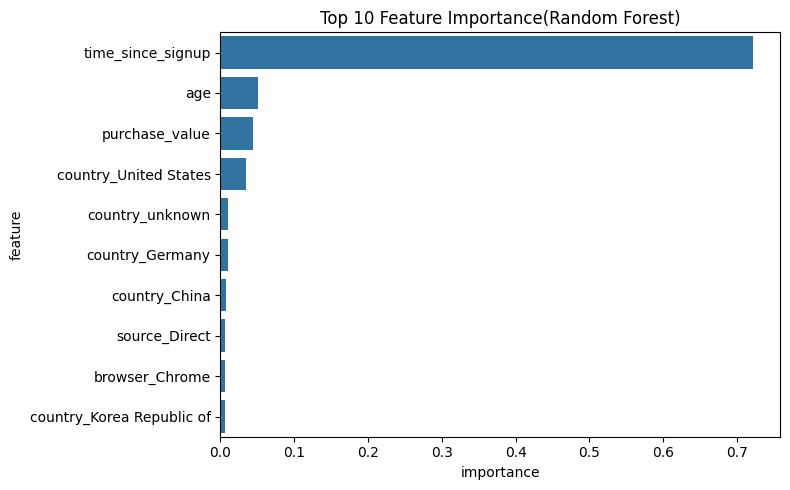

In [8]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.barplot(data=top10,x="importance",y="feature")
plt.title("Top 10 Feature Importance(Random Forest)")
plt.tight_layout()
plt.show()
